## ConvTranspose2d

#### ConvTranspose2d의 output size가 나오는 과정을 알아보자.


### <DCGAN에서 Generator 모델의 과정>

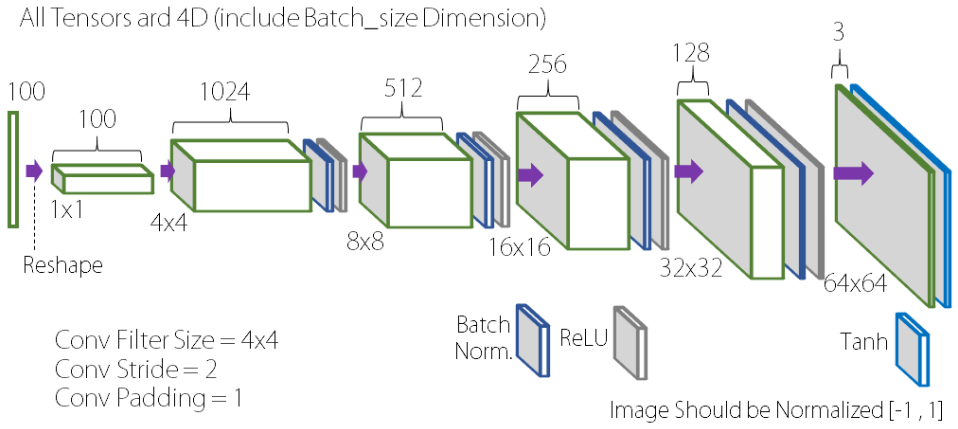

In [4]:
from PIL import Image
image = Image.open("./img/generator.png")
image

In [ ]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

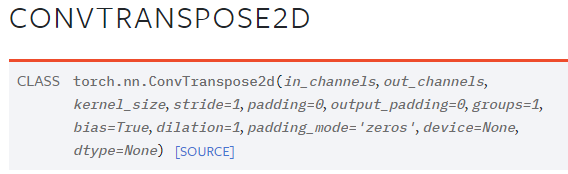

In [1]:
from PIL import Image
image = Image.open("./img/1.png")
image

### Feature가 ConvTranspose2d를 거치며 변화하는 과정을 (in_channels, W, H) 로 나타내자

#### ((ngf * 8), 4, 4)) -> ((ngf * 4), 8, 8)) -> ((ngf * 2), 16, 16)) -> ((ngf), 32, 32))   여기서  ngf=64


### <channel size 구하는 식>

##### [ (W-K+2P) / S ]+1
- W is the input volume : in this case ngf8
- K is the Kernel size : in this case 4
- P is the padding : in this case 1
- S is the sstride : in this case 2

#### W에 input channel ( ngf * 8 )을 넣고 식을 계산하면 output channel ( ngf * 4 ) 가 나오는 것을 확인 할 수 있으므로 Conv2d를 거쳤을 때 channel이 점점 늘어나는 것과 반대되는 것을 볼 수 있다.

### <image size 구하는 식>

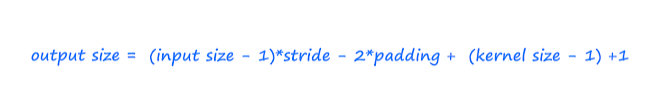

In [2]:
from PIL import Image
image = Image.open("./img/2.png")
image

#### input size에 (4,4)인 이미지 4를 넣고 계산하면 output size는 8이므로 이미지의 사이즈가 (8,8)이 된 것을 확인할 수 있다.
#### 이로 인해 Conv2d를 거쳤을 때 image size가 점점 작아지는 것과 반대되는 것을 볼 수 있다.